## Libraries & Dataset

Let's start by import a few libraries and create a dataset:


In [5]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
 
# create data
df = pd.DataFrame({
   'x': np.random.normal(size=10000),
   'y': np.random.normal(size=10000)
})
df.head()

,x,y
0,0.310256,0.523202
1,1.689054,0.211584
2,0.822795,0.328821
3,0.137791,0.988868
4,-1.469767,0.216877


## Smoothing

Displaying a `kde plot` requires to **smooth** the data. For this we use the `gaussian_kde()` function from `scipy`.


In [6]:
# Init values and parameters
nbins = 300
x = df['x'] # change 'x' with your column name
y = df['y'] # change 'y' with your column name

k = gaussian_kde([x,y])
xi, yi = np.mgrid[
   x.min():x.max():nbins*1j,
   y.min():y.max():nbins*1j
]
zi = k(np.vstack([
   xi.flatten(),
   yi.flatten()
])).reshape(xi.shape)

## 2d density plot

2d density plot requires to use the `pcolormesh()` function:


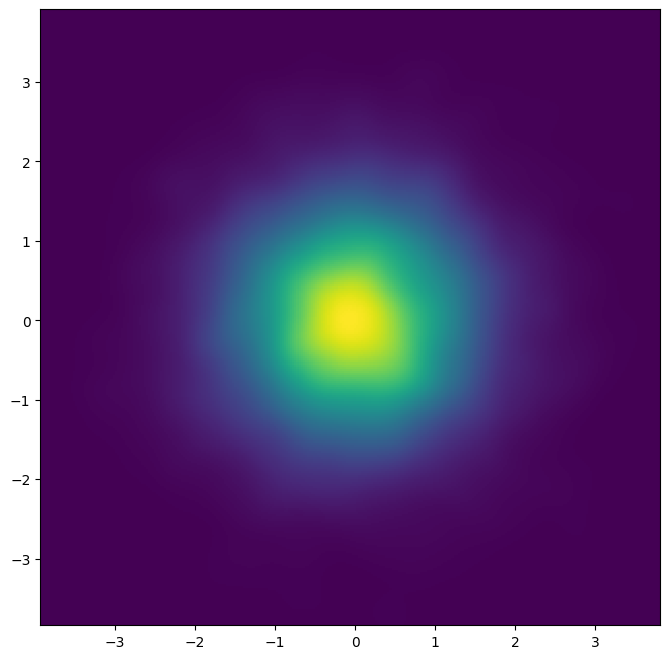

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pcolormesh(xi, yi, zi)
plt.show()

## Colors

Thanks to the `cmap` argument we can super easily **change the colors** used the chart. Here you can find different examples:


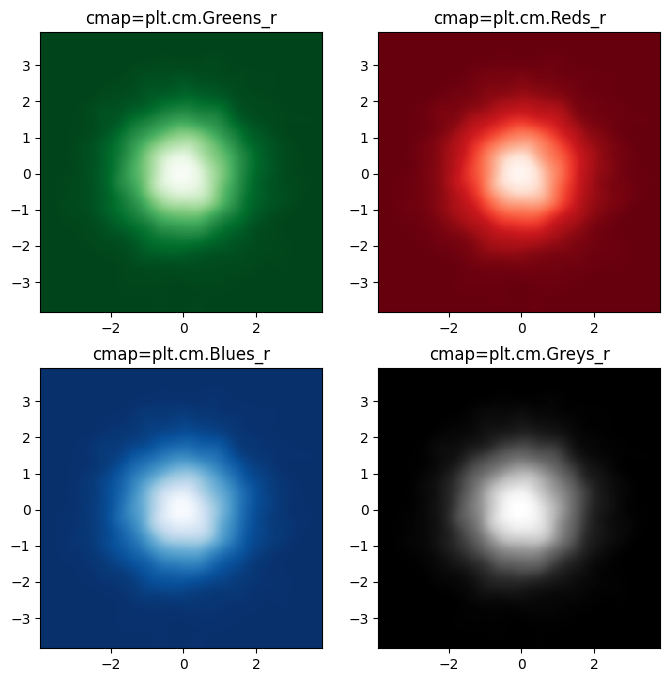

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

# green colormap
axs[0,0].pcolormesh(xi, yi, zi, cmap=plt.cm.Greens_r)
axs[0,0].set_title('cmap=plt.cm.Greens_r')

# red colormap
axs[0,1].pcolormesh(xi, yi, zi, cmap=plt.cm.Reds_r)
axs[0,1].set_title('cmap=plt.cm.Reds_r')

# blue colormap
axs[1,0].pcolormesh(xi, yi, zi, cmap=plt.cm.Blues_r)
axs[1,0].set_title('cmap=plt.cm.Blues_r')

# grey colormap
axs[1,1].pcolormesh(xi, yi, zi, cmap=plt.cm.Greys_r)
axs[1,1].set_title('cmap=plt.cm.Greys_r')

plt.show()

## Colorbar and legend

You can add a color bar easily using `colorbar()` function.


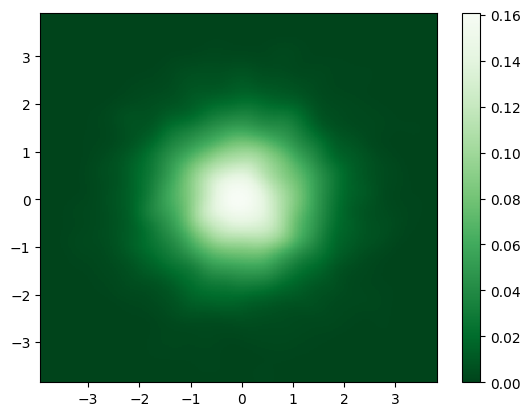

In [21]:
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
plt.colorbar()
plt.show()

## Going further

You might be interested:

- how to create a [contour plot](/80-contour-plot-with-seaborn) with seaborn

- how to combine a [2d density/histogram plot with marginal plot](/82-marginal-plot-with-seaborn)


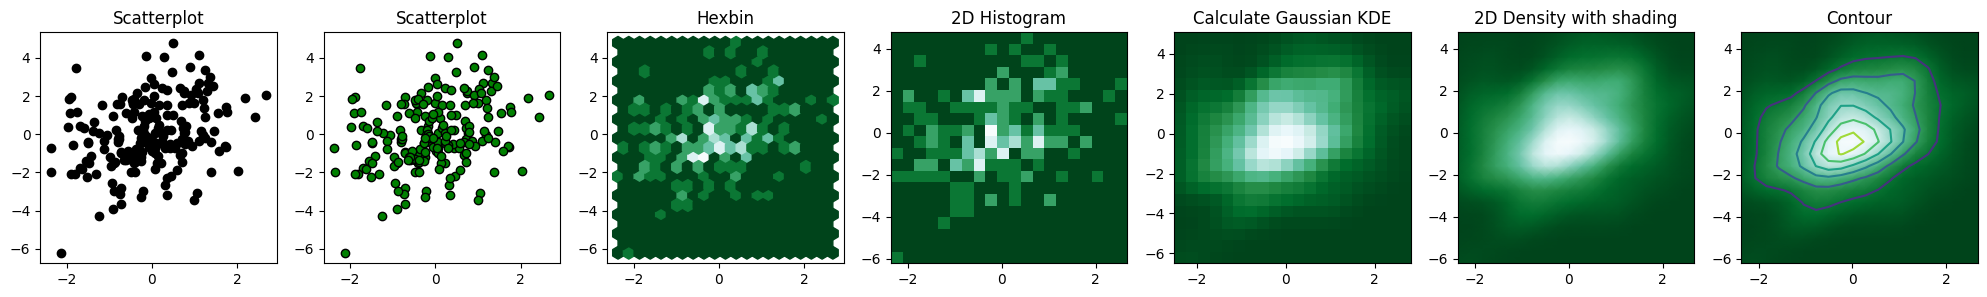

In [36]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
 
# Create data: 200 points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=7, nrows=1, figsize=(25, 3))
 
# Everything starts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# As you can see there is a lot of overlapping here!

# Everything starts with a Scatterplot
axes[1].set_title('Scatterplot')
axes[1].scatter(x, y, color='green', edgecolor='black')
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[2].set_title('Hexbin')
axes[2].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[3].set_title('2D Histogram')
axes[3].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[4].set_title('Calculate Gaussian KDE')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.BuGn_r)
 
# add shading
axes[5].set_title('2D Density with shading')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[6].set_title('Contour')
axes[6].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[6].contour(xi, yi, zi.reshape(xi.shape) )

fig.savefig('../../static/graph/what-is-density-chart.png', dpi=300)